In [2]:
import pandas as pd

import ast

import seaborn as sns

import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\Jesse\Downloads\data_jobs.csv")

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df['job_skills'] = df['job_skills'].apply( lambda a : ast.literal_eval(a) if pd.notna(a) else a) 


**FILTERING FOR US DATA ANALYST JOBS**

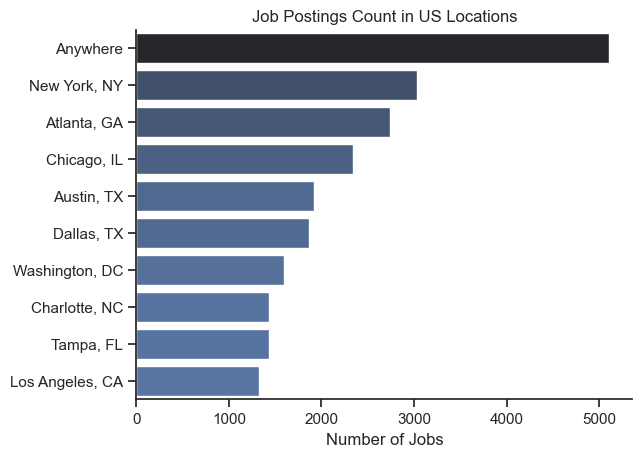

In [9]:
df_us = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

df_plot = df_us['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style= 'ticks')
sns.barplot(data= df_plot, x='count', y= 'job_location', hue= 'count', palette='dark:b_r', legend= False)
sns.despine()
plt.title('Job Postings Count in US Locations')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

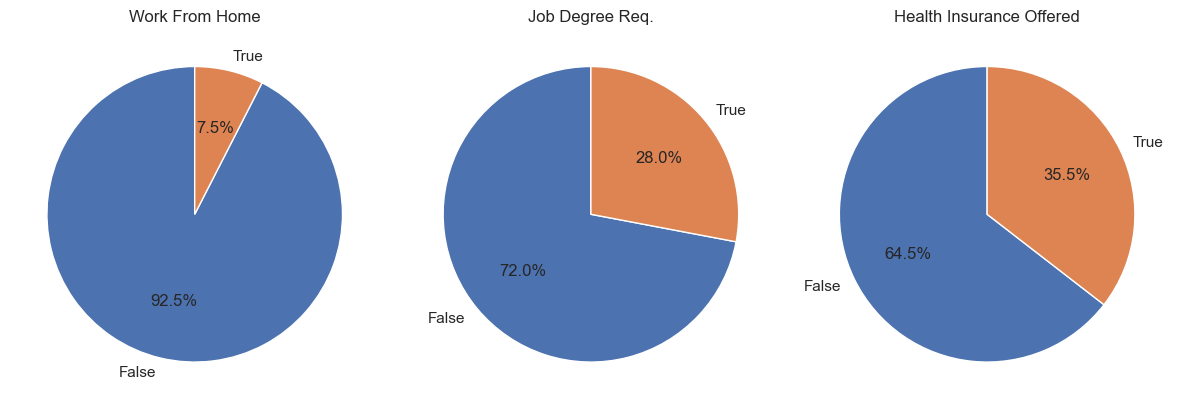

In [10]:

dict_column = {
    'job_work_from_home': 'Work From Home',
    'job_no_degree_mention':'Job Degree Req.',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1,3)
fig.set_size_inches((12,5))

for i, (column,title) in enumerate(dict_column.items()):
    ax[i].pie(df_us[column].value_counts(),startangle= 90, autopct= '%1.1f%%', labels= ['False','True'])
    ax[i].set_title(title)

fig.tight_layout()
plt.show()

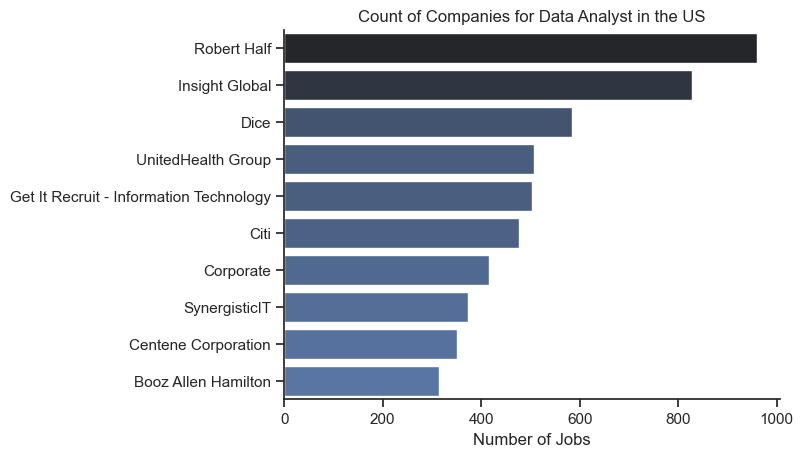

In [11]:

df_plot = df_us['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style= 'ticks')
sns.barplot(data= df_plot, x='count', y= 'company_name', hue= 'count', palette='dark:b_r', legend= False)
sns.despine()
plt.title('Count of Companies for Data Analyst in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()